<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/contrastStretching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img= cv2.imread("/content/Fig0310(b)(washed_out_pollen_image).tif",0) #Read the image


In [3]:
#Find max and min pixel value in the original image
rmin= img.min()
rmax= img.max()

# To ascertain total numbers of rows and columns of the image, size of the image
m,n= img.shape                      

In [4]:
#Create a new array to store pixel value of the new image
img_contrast= np.zeros((m,n), dtype=int) 

In [5]:
#Applying contrast stretching with the following values
#(r1,s1)= (rmin,0)
#(r2,s2)= (rmax,L-1)

r1= rmin
s1=0
r2=rmax
s2=255



In [6]:
#m1= s1/r1= 0
#s=m1*r for 0 ≤ r< r1
m1= s1/r1


In [7]:
#m2= (s2-s1)/(r2-r1)= (L-1)/(rmax-rmin)
#s= m(r-r1)+ s1 for  r1 ≤ r< r2
m2= (s2-s1)/(r2-r1)


In [8]:
#m3=(L-1-s2)/(L-1-r2)= 0
#s= m(r-r2)+ s2, for  r2 ≤ r ≤ L-1
m3= (255-s2)/(255-r2)

In [9]:
#Apply constrast stretching equations
for i in range(m):
    for j in range(n):
        if 0<=img[i,j]<r1:
          img_contrast[i,j]= m1*img[i,j] #s=m1*r for 0 ≤ r< r1
        elif r1<=img[i,j]<r2:
          img_contrast[i,j] = m2*(img[i,j]-r1)+ s1 #s= m(r-r1)+ s1 for  r1 ≤ r< r2
        else:
          img_contrast[i,j]= m3*(img[i,j]-r2)+ s2 #s= m(r-r2)+ s2, for  r2 ≤ r ≤ L-1

Text(0.5, 1.0, 'Image after applying contrast stretching')

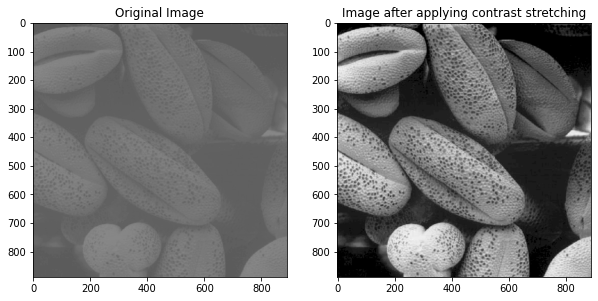

In [15]:
#Display the original and contrast stretched image
plt.figure(figsize=(10,10)) #to set figure size
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Original Image")


plt.subplot(1,2,2)
plt.imshow(img_contrast, cmap="gray", vmin=0, vmax=255)
plt.title("Image after applying contrast stretching")